In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import cv2 
import json
import numpy as np

import ritnet
import nia22

1. 라벨의 좌 우 끝이 평행이 되도록 자르기
2. RITnet에 맞는 적절한 크기로 (상하좌우 dx * 2 정도?) 
3. 640 * 400으로 resize
4. 눈 한 쪽씩 / 두눈 다 

In [5]:
ddir = "./SampleData/"

fn_json = ddir + "json/mobile_C_A_H1_02.json"
fn_jpg  = fn_json.replace("json", "jpg")

In [7]:
# 1. load annotation
anno = json.load(open(fn_json,"r"))

In [8]:
eye = nia22.eyes.Eye(anno["Annotations"]["image"]["annotations"])

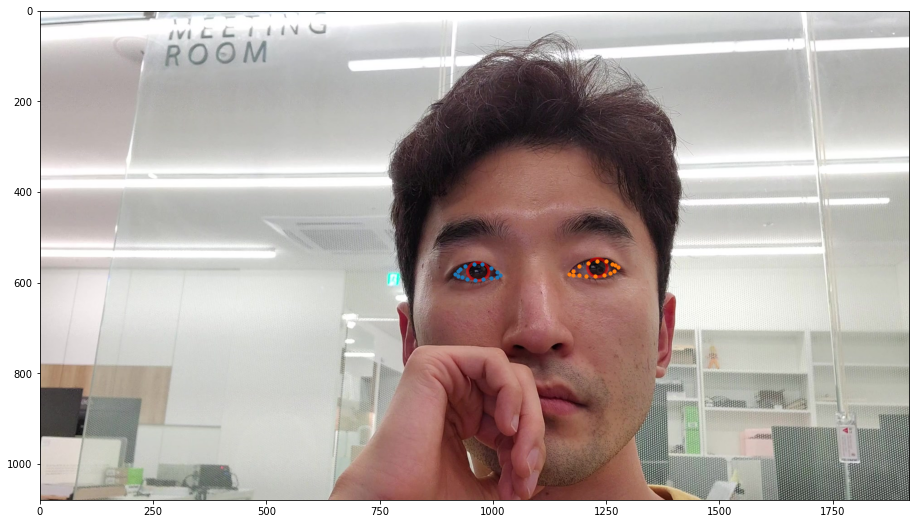

In [10]:
# 2. load image
img = cv2.cvtColor(cv2.imread(fn_jpg), cv2.COLOR_BGR2RGB)

from matplotlib.patches import Ellipse

plt.close("all")
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
fig.set_size_inches(16,9)

# 피사체의 왼쪽 눈
iris = eye.l_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse1 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse1)

# 공막
p_left_eyes = np.array(eye.l_eyelid['points'])
plt.scatter(p_left_eyes[:,0], p_left_eyes[:,1], s=10)


#피사체의 오른쪽 눈
iris = eye.r_iris
xc, yc = iris['cx'], iris['cy']
ra = iris['rx']
rb = iris['ry']
angle = iris['rotate']

ellipse2 = Ellipse((xc, yc), 2*ra,2*rb, angle=angle, alpha=0.5,
                  facecolor='none', edgecolor="red", lw=3)
ax.add_artist(ellipse2)

p_right_eyes = np.array(eye.r_eyelid['points'])
plt.scatter(p_right_eyes[:,0], p_right_eyes[:,1], s=10)


ax.imshow(img)


plt.show()

In [4]:
# 3. (optional) rotate image 

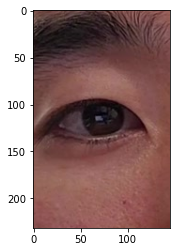

In [11]:
area, cropped = nia22.eyes.crop_eye(img, p_left_eyes)


plt.imshow(cropped)

In [ ]:
# 5. keep track of rotation and transplation info.